In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [20]:
file_path = 'cafe1.csv'

In [21]:
coffee = pd.read_csv(file_path)
coffee

,Number,Capsule name,Intensite,Price for capsule,Size of cup type1,Size of cup type2,Origine,Price for 100 gr,Collection,Type of coffee,Organic
0,1,Ispirazione Aosta,5.0,0.45,Espresso,NaN,South America,9.38,Collection Compostable,Arabica,No
1,2,Ispirazione Emilia,7.0,0.45,Espresso,Ristretto,Mexique and Brasil,9.38,Collection Compostable,Arabica and Robusta,No
2,3,Ispirazione Sicilia,8.0,0.45,Espresso,Ristretto,Latine America,9.38,Collection Compostable,Arabica,No
3,4,Peru Organic,5.0,0.52,Espresso,NaN,Peru,10.83,Collection Compostable,Arabica,Yes
4,5,Decaffeinato,7.0,0.48,Espresso,NaN,Peru,10.00,Collection Compostable,NaN,No
5,6,Tamuka mu Zimbabwe,5.0,0.67,Espresso,Lungo,Zimbabwe,12.18,Reviving Origins,Arabica,No
6,7,Cafecito de Cuba,10.0,1.30,Espresso,Lungo,Cuba,22.81,Reviving Origins,Arabica,No
7,8,Kahawa ya Congo Organic,7.0,0.69,Espresso,Lungo,Congo,12.55,Reviving Origins,Arabica,Yes
8,9,Ethiopa Organic,4.0,0.52,Espresso,Lungo,Ethiopa,9.29,Reviving Origins,Arabica,Yes
9,10,Peru Organic,6.0,0.52,Espresso,Lungo,Peru,8.97,Reviving Origins,Arabica,Yes


In [22]:
coffee.columns

Index(['Number', 'Capsule name', 'Intensite', 'Price for capsule',
       'Size of cup type1', 'Size of cup type2', 'Origine', 'Price for 100 gr',
       'Collection', 'Type of coffee', 'Organic'],
      dtype='object')

In [23]:
# dropping column "Number"
coffee.drop('Number', axis=1, inplace=True)

In [24]:
coffee.head()

,Capsule name,Intensite,Price for capsule,Size of cup type1,Size of cup type2,Origine,Price for 100 gr,Collection,Type of coffee,Organic
0,Ispirazione Aosta,5.0,0.45,Espresso,NaN,South America,9.38,Collection Compostable,Arabica,No
1,Ispirazione Emilia,7.0,0.45,Espresso,Ristretto,Mexique and Brasil,9.38,Collection Compostable,Arabica and Robusta,No
2,Ispirazione Sicilia,8.0,0.45,Espresso,Ristretto,Latine America,9.38,Collection Compostable,Arabica,No
3,Peru Organic,5.0,0.52,Espresso,NaN,Peru,10.83,Collection Compostable,Arabica,Yes
4,Decaffeinato,7.0,0.48,Espresso,NaN,Peru,10.00,Collection Compostable,NaN,No


In [25]:
coffee['Collecion'] = coffee['Collection'].str.replace('Collection ', 'Collection')

In [26]:
collection_grouped = coffee.groupby('Collection')

In [27]:
# mean price per capsule and per collecion of coffee
mean_price_per_capsule = collection_grouped['Price for capsule'].mean()

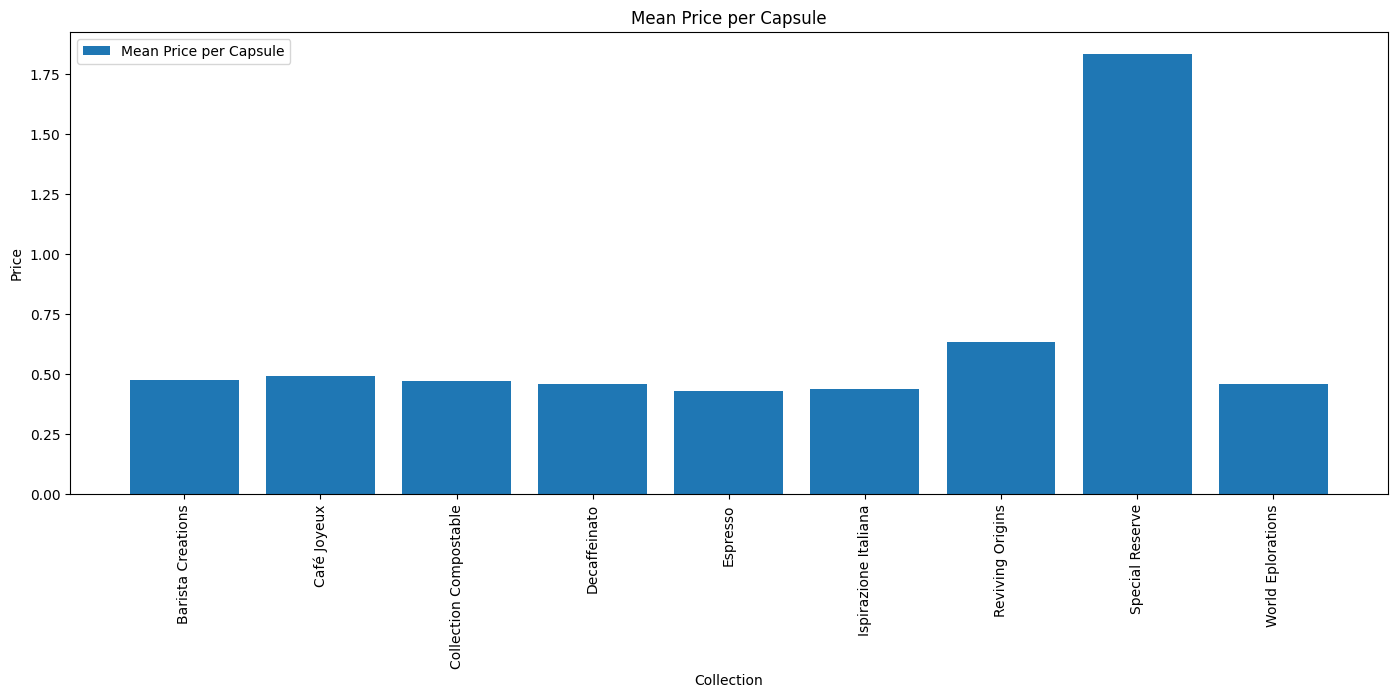

In [28]:
plt.figure(figsize=(17, 6))
plt.bar(mean_price_per_capsule.index, mean_price_per_capsule, label='Mean Price per Capsule')
plt.xlabel('Collection')
plt.ylabel('Price')
plt.title('Mean Price per Capsule')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [29]:
# mean price per collection of coffee and per 100 gr of coffee
mean_price_per_100gr = collection_grouped['Price for 100 gr'].mean()

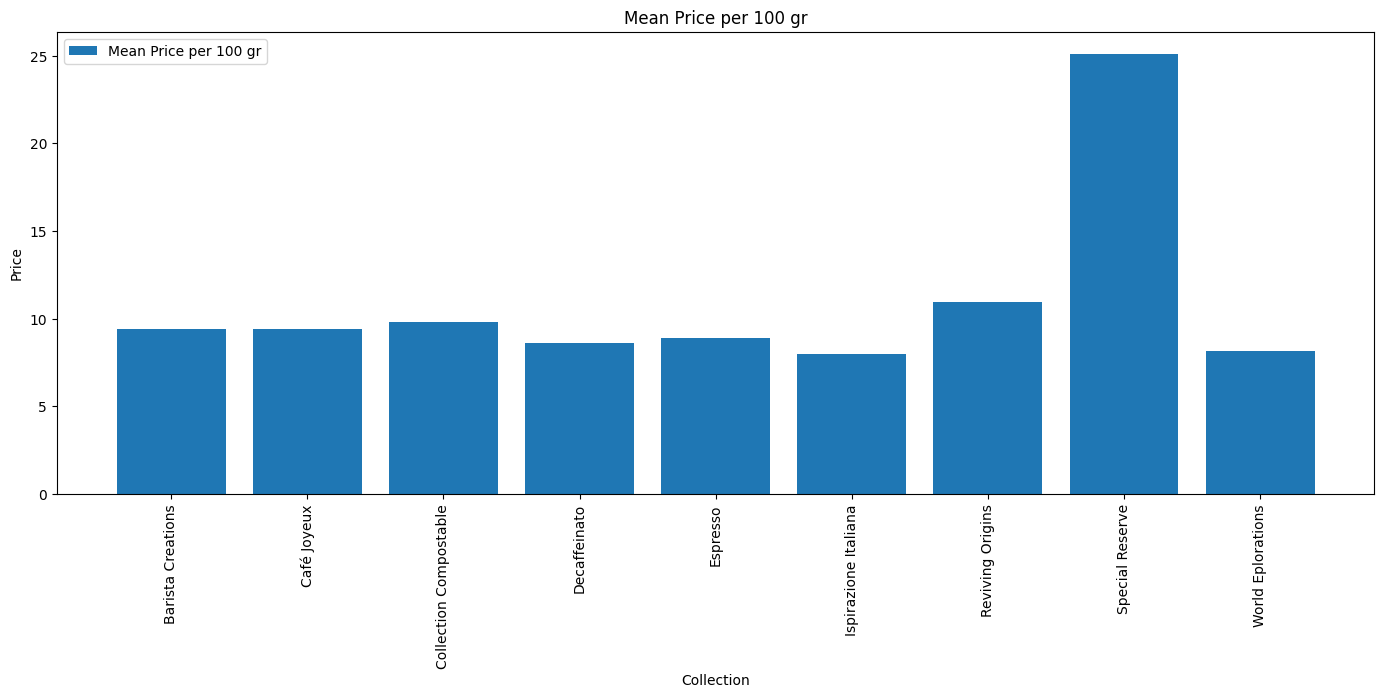

In [30]:
plt.figure(figsize=(17, 6))
plt.bar(mean_price_per_100gr.index, mean_price_per_100gr, label='Mean Price per 100 gr')
plt.xlabel('Collection')
plt.ylabel('Price')
plt.title('Mean Price per 100 gr')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [31]:
# organic coffee is more expensive then not organic

In [32]:
organic_counts = coffee['Organic'].value_counts()
organic_counts

Organic
No     42
Yes     5
Name: count, dtype: int64

In [33]:
# grouping organic or not organic
organic_nonorganic = coffee.groupby('Organic')

In [34]:
organic_per_100gr = organic_nonorganic['Price for 100 gr'].mean()

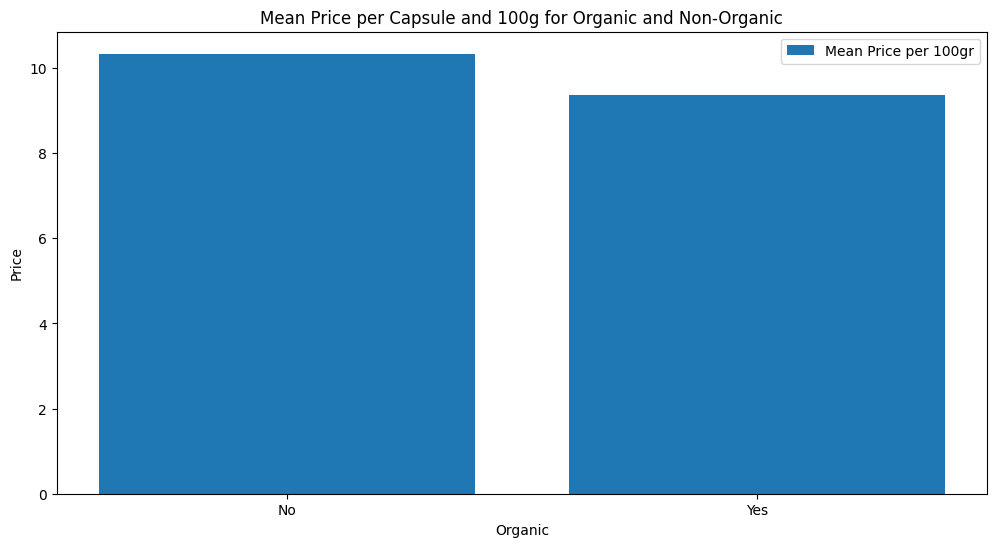

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(organic_per_100gr.index, organic_per_100gr, label='Mean Price per 100gr')
plt.xlabel('Organic')
plt.ylabel('Price')
plt.title('Mean Price per Capsule and 100g for Organic and Non-Organic')
plt.xticks(rotation=0)  # You can set the rotation to 0 for "Organic" and "Not Organic" labels
plt.legend()
plt.show()

In [36]:
# Checking most popular type of coffee for those capsules.
# Removing NAN in types of coffee

In [37]:
nan_check_before = coffee['Type of coffee'].isnull()
print(coffee[nan_check_before])

            Capsule name  Intensite  Price for capsule Size of cup type1  \
4           Decaffeinato        7.0               0.48          Espresso   
16             Galapagos        NaN               1.50          Espresso   
42     Filter style Mild        NaN               0.43             Lungo   
43  Filter Style Intense        NaN               0.43             Lungo   

   Size of cup type2           Origine  Price for 100 gr  \
4                NaN              Peru             10.00   
16               NaN         Galapagos             25.86   
42               NaN   Columbia, Kenya              8.96   
43               NaN  Columbia, Brasil              8.96   

                Collection Type of coffee Organic              Collecion  
4   Collection Compostable            NaN      No  CollectionCompostable  
16         Special Reserve            NaN      No        Special Reserve  
42       Barista Creations            NaN      No      Barista Creations  
43       Barista C

In [38]:
coffee_data = coffee.dropna(subset=['Type of coffee'])
coffee_data

,Capsule name,Intensite,Price for capsule,Size of cup type1,Size of cup type2,Origine,Price for 100 gr,Collection,Type of coffee,Organic,Collecion
0,Ispirazione Aosta,5.0,0.45,Espresso,NaN,South America,9.38,Collection Compostable,Arabica,No,CollectionCompostable
1,Ispirazione Emilia,7.0,0.45,Espresso,Ristretto,Mexique and Brasil,9.38,Collection Compostable,Arabica and Robusta,No,CollectionCompostable
2,Ispirazione Sicilia,8.0,0.45,Espresso,Ristretto,Latine America,9.38,Collection Compostable,Arabica,No,CollectionCompostable
3,Peru Organic,5.0,0.52,Espresso,NaN,Peru,10.83,Collection Compostable,Arabica,Yes,CollectionCompostable
5,Tamuka mu Zimbabwe,5.0,0.67,Espresso,Lungo,Zimbabwe,12.18,Reviving Origins,Arabica,No,Reviving Origins
6,Cafecito de Cuba,10.0,1.30,Espresso,Lungo,Cuba,22.81,Reviving Origins,Arabica,No,Reviving Origins
7,Kahawa ya Congo Organic,7.0,0.69,Espresso,Lungo,Congo,12.55,Reviving Origins,Arabica,Yes,Reviving Origins
8,Ethiopa Organic,4.0,0.52,Espresso,Lungo,Ethiopa,9.29,Reviving Origins,Arabica,Yes,Reviving Origins
9,Peru Organic,6.0,0.52,Espresso,Lungo,Peru,8.97,Reviving Origins,Arabica,Yes,Reviving Origins
10,Indonesia Organic,8.0,0.52,Espresso,Lungo,Indonesia,5.20,Reviving Origins,Arabica,Yes,Reviving Origins


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14592\3127765599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of coffee', data=coffee_data, palette='viridis')


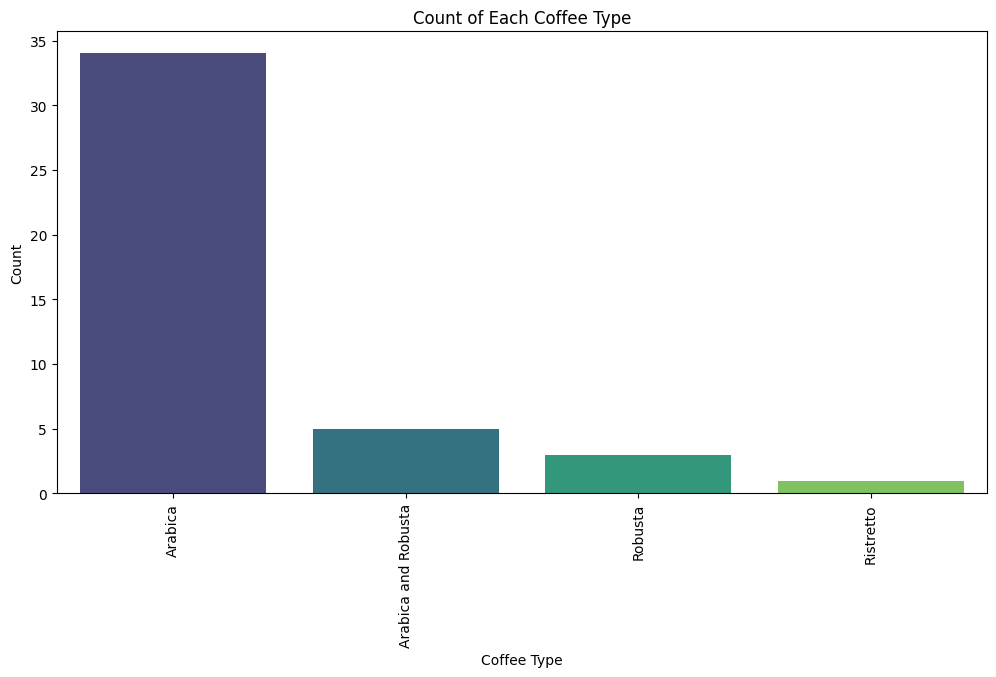

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type of coffee', data=coffee_data, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Coffee Type')
plt.ylabel('Count')
plt.title('Count of Each Coffee Type')
plt.show()

In [40]:
median_price_per_collection = coffee.groupby('Collection')['Price for 100 gr'].median().reset_index()

#  median price per coffee type (Robusta, Arabica, or Arabica and Robusta)
median_price_per_coffee_type = coffee.groupby('Type of coffee')['Price for 100 gr'].median().reset_index()


print("Median Price per Collection:")
print(median_price_per_collection)

print("\nMedian Price per Coffee Type:")
print(median_price_per_coffee_type)

Median Price per Collection:
               Collection  Price for 100 gr
0       Barista Creations              9.38
1             Café Joyeux              9.42
2  Collection Compostable              9.38
3            Decaffeinato              8.36
4                Espresso              8.96
5    Ispirazione Italiana              8.11
6        Reviving Origins              9.29
7         Special Reserve             25.86
8       World Eplorations              8.21

Median Price per Coffee Type:
        Type of coffee  Price for 100 gr
0              Arabica             8.965
1  Arabica and Robusta             8.210
2            Ristretto             7.540
3              Robusta             8.070


In [41]:
#  median price per capsule for each collection
median_price_per_collection = coffee.groupby('Collection')['Price for capsule'].median().reset_index()

print("Median Price per Capsule for Collection:")
print(median_price_per_collection)

Median Price per Capsule for Collection:
               Collection  Price for capsule
0       Barista Creations               0.49
1             Café Joyeux               0.49
2  Collection Compostable               0.45
3            Decaffeinato               0.46
4                Espresso               0.43
5    Ispirazione Italiana               0.43
6        Reviving Origins               0.52
7         Special Reserve               1.50
8       World Eplorations               0.46


In [42]:
# median price per capsule for each type of coffee
median_price_per_coffee_type = coffee.groupby('Type of coffee')['Price for capsule'].median().reset_index()

print("Median Price per Capsule for Type of Coffee:")
print(median_price_per_coffee_type)

Median Price per Capsule for Type of Coffee:
        Type of coffee  Price for capsule
0              Arabica               0.49
1  Arabica and Robusta               0.46
2            Ristretto               0.43
3              Robusta               0.46


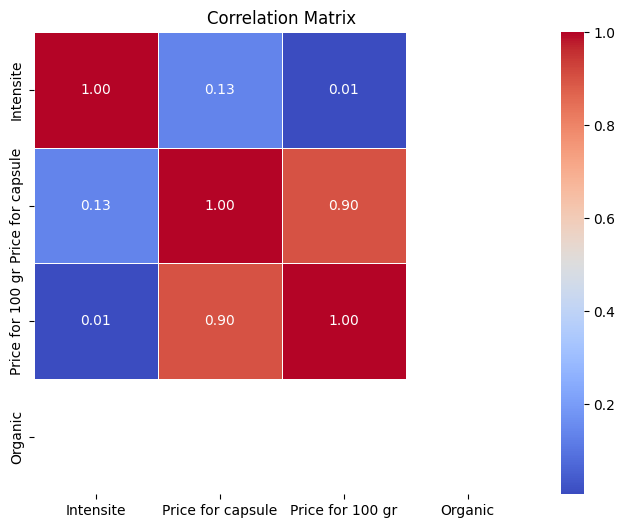

In [44]:
# Assuming 'Organic' is a binary column
coffee['Organic'] = coffee['Organic'].map({'Yes': 1, 'No': 0})

selected_columns = ['Intensite', 'Price for capsule', 'Price for 100 gr', 'Organic']

selected_df = coffee[selected_columns]

# Calculating correlation
correlation_matrix = selected_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()